In [2]:
print("hello, it works!")
      

hello, it works!


In [3]:
import subprocess
subprocess.run(["pip", "install", "pandas", "numpy", "scikit-learn", "matplotlib", "seaborn", "scipy"])

CompletedProcess(args=['pip', 'install', 'pandas', 'numpy', 'scikit-learn', 'matplotlib', 'seaborn', 'scipy'], returncode=0)

In [4]:
import os
# Change this path to wherever your files downloaded to
path = os.path.expanduser("~/Downloads")
for f in os.listdir(path):
    print(f)

.pdf.pdf
079_ Graduands Eligible.pdf
10 th Marks.JPG
10th marksheet.pdf
12 th Marks.JPG
12 th passing certificate.jpg
12th marksheet.pdf
19BBT0190_VL2020210100734_PE003.pdf
19BBT0190_VL2023240101947_PE003.pdf
19BBT0190_VL2023240500460_PE004.pdf
2.pdf
20170114-a5.pdf
20210440.epub
39th Annual Convocation 2024 - Instruction Manual.pdf
39th Annual Convocation_Rank List (1).pdf
39th Annual Convocation_Rank List.pdf
48lawsofpower.pdf
5 lb. Book of GRE Practice Problems - Manhattan Prep.pdf
8JG5C008 (1).pdf
8JG5C008 (2).pdf
8JG5C008.pdf
95818.jpg
aadhar card.jpeg
ablebits-ultimate-suite-excel-v2024-1-3443-1616.exe
Adm Report with Ward May 2024 (1).xlsx
Adm Report with Ward May 2024.xlsx
Anaconda3-2025.12-1-Windows-x86_64.exe
anki-24.06.3-windows-qt6.exe
Annexure 2_(Lvl 3)_VIZAG_Rel (1).pdf
Annexure 2_(Lvl 3)_VIZAG_Rel.pdf
apollo.internship.jpg
ARVO 2025         May 4 to 8 PPT.pptx
A_V UCB.mp4
bac.plate1.jpg
bac.plate2.jpg
bac.plate3.jpg
bac.plate4.jpg
BaggageTag.pdf
Barrons_GRE_12th_Edition_

In [5]:
import pandas as pd
import os

# Set the path to your downloads folder
downloads = r"C:\Users\\" + os.getlogin() + r"\Downloads"

# List just the UVM-related files to confirm
uvm_files = [f for f in os.listdir(downloads) if 'UVM' in f or 'TCGA' in f or 'dense' in f.lower()]
for f in uvm_files:
    print(f)

denseDataOnlyDownload.tsv
TCGA.UVM.sampleMap_HiSeqV2 (1)
TCGA.UVM.sampleMap_HiSeqV2 (1).gz
TCGA.UVM.sampleMap_HiSeqV2.gz
TCGA.UVM.sampleMap_HiSeqV2_PANCAN
TCGA.UVM.sampleMap_HiSeqV2_PANCAN.gz
TCGA.UVM.sampleMap_HumanMethylation450.gz
UVM.HiSeqV2.txt


In [6]:
import gzip
import shutil

# Unzip the methylation file
meth_gz = os.path.join(downloads, "TCGA.UVM.sampleMap_HumanMethylation450.gz")
meth_out = os.path.join(downloads, "methylation450.tsv")

with gzip.open(meth_gz, 'rb') as f_in:
    with open(meth_out, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

print("Unzipped! Now loading...")
meth = pd.read_csv(meth_out, sep='\t', index_col=0)
print("Methylation shape:", meth.shape)
print(meth.iloc[:5, :3])  # preview first 5 rows, 3 columns

Unzipped! Now loading...
Methylation shape: (485577, 80)
            TCGA-V4-A9EX-01  TCGA-V4-A9E5-01  TCGA-V4-A9EZ-01
sample                                                       
cg13332474           0.0303           0.0287           0.0265
cg00651829           0.0185           0.0175           0.3494
cg17027195           0.0422           0.0454           0.0370
cg09868354           0.0585           0.0814           0.0693
cg03050183           0.0615           0.0641           0.0598


In [7]:
rna_path = os.path.join(downloads, "UVM.HiSeqV2.txt")
rna = pd.read_csv(rna_path, sep='\t', index_col=0)
print("RNA shape:", rna.shape)
print(rna.iloc[:5, :3])

RNA shape: (20530, 80)
           TCGA-VD-A8KM-01  TCGA-V4-A9F4-01  TCGA-WC-A881-01
sample                                                      
ARHGEF10L          10.1923          10.0458           9.1889
HIF3A               3.5305           9.6380           6.4852
RNF17               0.0000           0.6527           0.0000
RNF10              12.3955          11.7825          11.8303
RNF11              10.8320          11.1886           9.0264


In [8]:
clin_path = os.path.join(downloads, "denseDataOnlyDownload.tsv")
clin = pd.read_csv(clin_path, sep='\t', index_col=0)
print("Clinical shape:", clin.shape)
print(clin.columns.tolist())  # show all column names

Clinical shape: (80, 3)
['samples', 'GNAQ', 'BAP1']


In [9]:
# Let's properly look at the mutation/driver data
mut_path = os.path.join(downloads, "denseDataOnlyDownload.tsv")
mut = pd.read_csv(mut_path, sep='\t', index_col=0)
print(mut.head(10))
print("\nUnique values in GNAQ:", mut['GNAQ'].unique())
print("Unique values in BAP1:", mut['BAP1'].unique())

                         samples   GNAQ    BAP1
sample                                         
TCGA-V4-A9ES-01  TCGA-V4-A9ES-01  11.53  10.190
TCGA-V4-A9EU-01  TCGA-V4-A9EU-01  11.33   8.405
TCGA-V4-A9EO-01  TCGA-V4-A9EO-01  11.26  11.300
TCGA-VD-A8KO-01  TCGA-VD-A8KO-01  11.21  11.310
TCGA-WC-A87Y-01  TCGA-WC-A87Y-01  11.16   9.394
TCGA-V4-A9F7-01  TCGA-V4-A9F7-01  11.05  11.970
TCGA-V4-A9EK-01  TCGA-V4-A9EK-01  11.03  11.720
TCGA-VD-AA8T-01  TCGA-VD-AA8T-01  11.03   8.787
TCGA-VD-A8KH-01  TCGA-VD-A8KH-01  10.99  10.830
TCGA-VD-A8KD-01  TCGA-VD-A8KD-01  10.98  10.940

Unique values in GNAQ: [11.53  11.33  11.26  11.21  11.16  11.05  11.03  10.99  10.98  10.96
 10.95  10.93  10.92  10.91  10.87  10.82  10.81  10.77  10.76  10.75
 10.74  10.69  10.67  10.66  10.63  10.62  10.61  10.57  10.52  10.49
 10.47  10.46  10.39  10.37  10.36  10.34  10.32  10.31  10.28  10.26
 10.23  10.22  10.19  10.18  10.15  10.14  10.12  10.11  10.08  10.06
  9.998  9.996  9.97   9.928  9.821  9.813  9.647 

In [10]:
print("RNA shape:", rna.shape)
print("First few gene names:", rna.index[:10].tolist())
print("First few sample names:", rna.columns[:5].tolist())

RNA shape: (20530, 80)
First few gene names: ['ARHGEF10L', 'HIF3A', 'RNF17', 'RNF10', 'RNF11', 'RNF13', 'GTF2IP1', 'REM1', 'MTVR2', 'RTN4RL2']
First few sample names: ['TCGA-VD-A8KM-01', 'TCGA-V4-A9F4-01', 'TCGA-WC-A881-01', 'TCGA-V4-A9F1-01', 'TCGA-VD-AA8N-01']


In [11]:
import urllib.request

url = "https://tcga-xena-hub.s3.us-east-1.amazonaws.com/download/TCGA.UVM.sampleMap%2FUVM_clinicalMatrix"
save_path = os.path.join(downloads, "UVM_clinicalMatrix.tsv")

print("Downloading...")
urllib.request.urlretrieve(url, save_path)
print("Done!")

# Load and inspect it
clin = pd.read_csv(save_path, sep='\t', index_col=0)
print("Shape:", clin.shape)
print("\nColumns:")
for col in clin.columns:
    print(col)

Downloading...
Done!
Shape: (80, 96)

Columns:
_INTEGRATION
_PATIENT
_cohort
_primary_disease
_primary_site
additional_pharmaceutical_therapy
additional_radiation_therapy
age_at_initial_pathologic_diagnosis
bcr_followup_barcode
bcr_patient_barcode
bcr_sample_barcode
clinical_M
clinical_N
clinical_T
clinical_stage
cytogenetic_abnormality
days_to_birth
days_to_collection
days_to_death
days_to_initial_pathologic_diagnosis
days_to_last_followup
days_to_new_tumor_event_after_initial_treatment
extranocular_nodule_size
extrascleral_extension
extravascular_matrix_patterns
eye_color
form_completion_date
gender
gene_expression_profile
height
histological_type
history_of_neoadjuvant_treatment
icd_10
icd_o_3_histology
icd_o_3_site
informed_consent_verified
initial_pathologic_diagnosis_method
initial_weight
is_ffpe
lost_follow_up
metastatic_site
mitotic_count
new_neoplasm_event_occurrence_anatomic_site
new_neoplasm_event_type
new_neoplasm_occurrence_anatomic_site_text
new_tumor_event_additional_sur

In [12]:
# We'll create the survival data directly from what you pasted
# First let's try loading the webpage file — check what it was saved as
import os
surv_files = [f for f in os.listdir(downloads) if 'survival' in f.lower() or 'CDR' in f.lower() or 'clinical' in f.lower()]
print(surv_files)

['TCGA.UVM.sampleMap_UVM_clinicalMatrix', 'UVM_clinicalMatrix.tsv']


In [13]:
# Create survival data from what you shared
import pandas as pd
import numpy as np
import os

downloads = r"C:\Users\\" + os.getlogin() + r"\Downloads"

# Load the clinical matrix you already have
clin = pd.read_csv(os.path.join(downloads, "UVM_clinicalMatrix.tsv"), sep='\t', index_col=0)

# Use PFI as our metastasis/progression label
# We'll build it from the clinical data
print(clin['new_tumor_event_after_initial_treatment'].value_counts(dropna=False))
print("\n")
print(clin['vital_status'].value_counts(dropna=False))

new_tumor_event_after_initial_treatment
NO     59
YES    20
NaN     1
Name: count, dtype: int64


vital_status
LIVING      57
DECEASED    23
Name: count, dtype: int64


In [14]:
# Create your label
y = clin['new_tumor_event_after_initial_treatment'].map({'YES': 1, 'NO': 0})
y = y.dropna()  # remove the 1 NaN patient

print("Label distribution:")
print(y.value_counts())
print("\nTotal patients with labels:", len(y))

Label distribution:
new_tumor_event_after_initial_treatment
0.0    59
1.0    20
Name: count, dtype: int64

Total patients with labels: 79


In [15]:
# Load RNA data
rna = pd.read_csv(os.path.join(downloads, "UVM.HiSeqV2.txt"), sep='\t', index_col=0)

# Transpose so rows = patients, columns = genes
rna_t = rna.T

# Standardize index to match label format
rna_t.index = rna_t.index.str[:15]
y.index = y.index.str[:15]

# Find common samples
common = rna_t.index.intersection(y.index)
print("Common samples:", len(common))

# Filter to common samples
rna_t = rna_t.loc[common]
y_aligned = y.loc[common]

print("RNA shape:", rna_t.shape)
print("Labels shape:", y_aligned.shape)

Common samples: 79
RNA shape: (79, 20530)
Labels shape: (79,)


In [16]:
from scipy.stats import ttest_ind
from sklearn.feature_selection import VarianceThreshold

# Step 1 - Remove low variance genes (near-constant across patients, useless)
selector = VarianceThreshold(threshold=0.1)
rna_filtered = rna_t.loc[:, rna_t.var() > 0.1]
print("After variance filter:", rna_filtered.shape)

# Step 2 - Select top 500 genes most different between YES and NO groups
group1 = rna_filtered[y_aligned == 1]  # progressed
group0 = rna_filtered[y_aligned == 0]  # stable

pvals = ttest_ind(group1, group0).pvalue
top500_genes = pd.Series(pvals, index=rna_filtered.columns).nsmallest(500).index

rna_selected = rna_filtered[top500_genes]
print("After feature selection:", rna_selected.shape)

After variance filter: (79, 17879)
After feature selection: (79, 500)


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(rna_selected)
y_final = y_aligned.values

# Cross validation setup (5 fold, stratified to preserve class balance)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Random Forest
rf = RandomForestClassifier(n_estimators=500, random_state=42, class_weight='balanced')
rf_scores = cross_val_score(rf, X, y_final, cv=cv, scoring='roc_auc')
print(f"Random Forest AUC: {rf_scores.mean():.3f} ± {rf_scores.std():.3f}")

# SVM
svm = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)
svm_scores = cross_val_score(svm, X, y_final, cv=cv, scoring='roc_auc')
print(f"SVM AUC:           {svm_scores.mean():.3f} ± {svm_scores.std():.3f}")

Random Forest AUC: 0.879 ± 0.160
SVM AUC:           0.908 ± 0.111


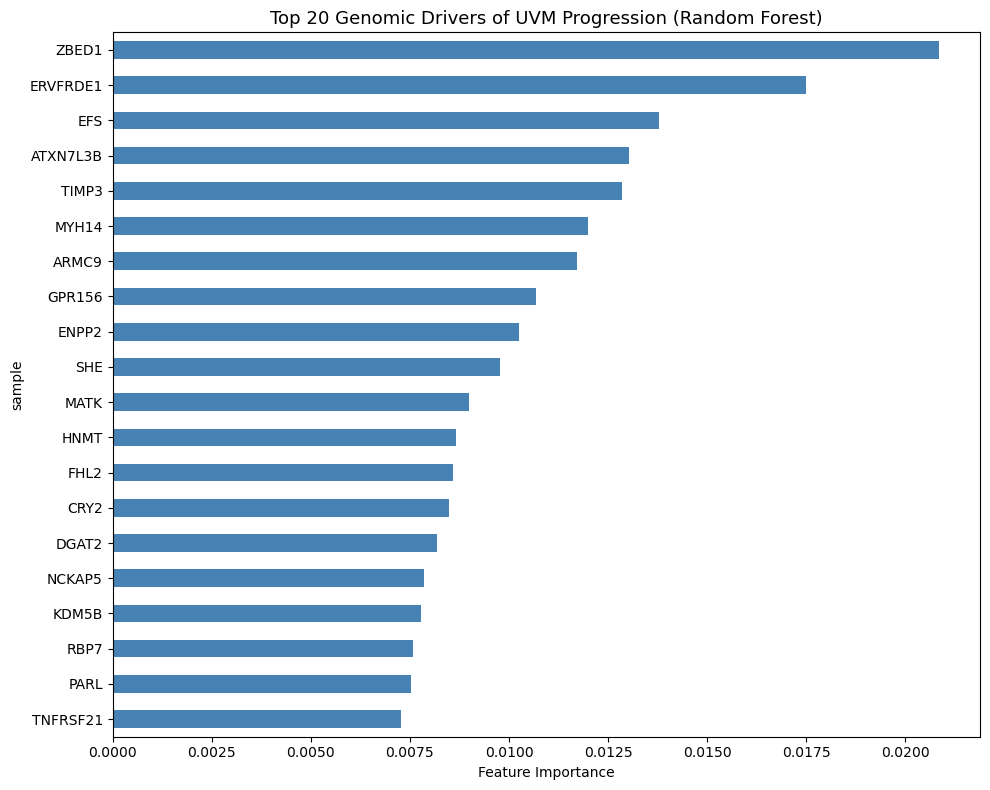


Top 20 genes:
sample
ZBED1       0.020839
ERVFRDE1    0.017488
EFS         0.013794
ATXN7L3B    0.013031
TIMP3       0.012849
MYH14       0.011993
ARMC9       0.011713
GPR156      0.010673
ENPP2       0.010262
SHE         0.009781
MATK        0.008993
HNMT        0.008665
FHL2        0.008588
CRY2        0.008473
DGAT2       0.008187
NCKAP5      0.007861
KDM5B       0.007775
RBP7        0.007586
PARL        0.007521
TNFRSF21    0.007285
dtype: float64


In [18]:
import matplotlib.pyplot as plt

# Fit Random Forest on ALL data to extract feature importances
rf.fit(X, y_final)

# Get top 20 most important genes
importances = pd.Series(rf.feature_importances_, index=rna_selected.columns)
top20 = importances.nlargest(20)

# Plot
plt.figure(figsize=(10, 8))
top20.sort_values().plot(kind='barh', color='steelblue')
plt.title('Top 20 Genomic Drivers of UVM Progression (Random Forest)', fontsize=13)
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.savefig(os.path.join(downloads, 'top20_drivers.png'), dpi=150)
plt.show()

print("\nTop 20 genes:")
print(top20)

In [19]:
import gzip
import shutil

# Unzip methylation file
meth_gz = os.path.join(downloads, "TCGA.UVM.sampleMap_HumanMethylation450.gz")
meth_out = os.path.join(downloads, "methylation450.tsv")

with gzip.open(meth_gz, 'rb') as f_in:
    with open(meth_out, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

print("Unzipped! Loading...")
meth = pd.read_csv(meth_out, sep='\t', index_col=0)
print("Methylation shape:", meth.shape)

Unzipped! Loading...
Methylation shape: (485577, 80)


In [20]:
# Transpose so rows = patients, columns = probes
meth_t = meth.T
meth_t.index = meth_t.index.str[:15]

# Align with labels
common_meth = meth_t.index.intersection(y.index)
meth_t = meth_t.loc[common_meth]
y_meth = y.loc[common_meth]

print("Common samples:", len(common_meth))
print("Methylation shape:", meth_t.shape)

# Drop probes with more than 20% missing values
meth_t = meth_t.loc[:, meth_t.isnull().mean() < 0.2]
print("After dropping missing probes:", meth_t.shape)

# Fill remaining NaNs with median
meth_t = meth_t.fillna(meth_t.median())
print("Missing values remaining:", meth_t.isnull().sum().sum())

Common samples: 79
Methylation shape: (79, 485577)
After dropping missing probes: (79, 395767)


KeyboardInterrupt: 

In [ ]:
# Variance filter first (methylation has many uninformative probes)
meth_filtered = meth_t.loc[:, meth_t.var() > 0.01]
print("After variance filter:", meth_filtered.shape)

# Select top 500 probes most different between progressors and stable
group1_m = meth_filtered[y_meth == 1]
group0_m = meth_filtered[y_meth == 0]

from scipy.stats import ttest_ind
pvals_m = ttest_ind(group1_m, group0_m).pvalue
top500_probes = pd.Series(pvals_m, index=meth_filtered.columns).nsmallest(500).index

meth_selected = meth_filtered[top500_probes]
print("After feature selection:", meth_selected.shape)

In [21]:
# More aggressive variance filter first to shrink probes
meth_filtered = meth_t.loc[:, meth_t.var() > 0.02]
print("After variance filter:", meth_filtered.shape)

After variance filter: (79, 70060)


In [22]:
# Drop probes with ANY missing values instead of imputing
# This avoids the memory problem entirely
meth_t = meth_t.dropna(axis=1)
print("After dropping NaN probes:", meth_t.shape)

After dropping NaN probes: (79, 394478)


In [23]:
from scipy.stats import ttest_ind

group1_m = meth_t[y_meth == 1]
group0_m = meth_t[y_meth == 0]

pvals_m = ttest_ind(group1_m, group0_m).pvalue
top500_probes = pd.Series(pvals_m, index=meth_t.columns).nsmallest(500).index

meth_selected = meth_t[top500_probes]
print("Methylation selected shape:", meth_selected.shape)

Methylation selected shape: (79, 500)


In [24]:
# Variance filter on the NaN-dropped data
meth_filtered = meth_t.loc[:, meth_t.var() > 0.02]
print("After variance filter:", meth_filtered.shape)

# T-test to select top 500 probes
group1_m = meth_filtered[y_meth == 1]
group0_m = meth_filtered[y_meth == 0]

pvals_m = ttest_ind(group1_m, group0_m).pvalue
top500_probes = pd.Series(pvals_m, index=meth_filtered.columns).nsmallest(500).index

meth_selected = meth_filtered[top500_probes]
print("Final methylation shape:", meth_selected.shape)

After variance filter: (79, 69622)
Final methylation shape: (79, 500)


In [25]:
# Combine both datasets
X_combined = pd.concat([rna_selected, meth_selected], axis=1)
print("Combined shape:", X_combined.shape)

# Scale
X_scaled = scaler.fit_transform(X_combined)

# Random Forest
rf_scores2 = cross_val_score(rf, X_scaled, y_final, cv=cv, scoring='roc_auc')
print(f"Random Forest AUC (RNA + Methylation): {rf_scores2.mean():.3f} ± {rf_scores2.std():.3f}")

# SVM
svm_scores2 = cross_val_score(svm, X_scaled, y_final, cv=cv, scoring='roc_auc')
print(f"SVM AUC (RNA + Methylation):           {svm_scores2.mean():.3f} ± {svm_scores2.std():.3f}")

Combined shape: (79, 1000)
Random Forest AUC (RNA + Methylation): 0.887 ± 0.131
SVM AUC (RNA + Methylation):           0.908 ± 0.131


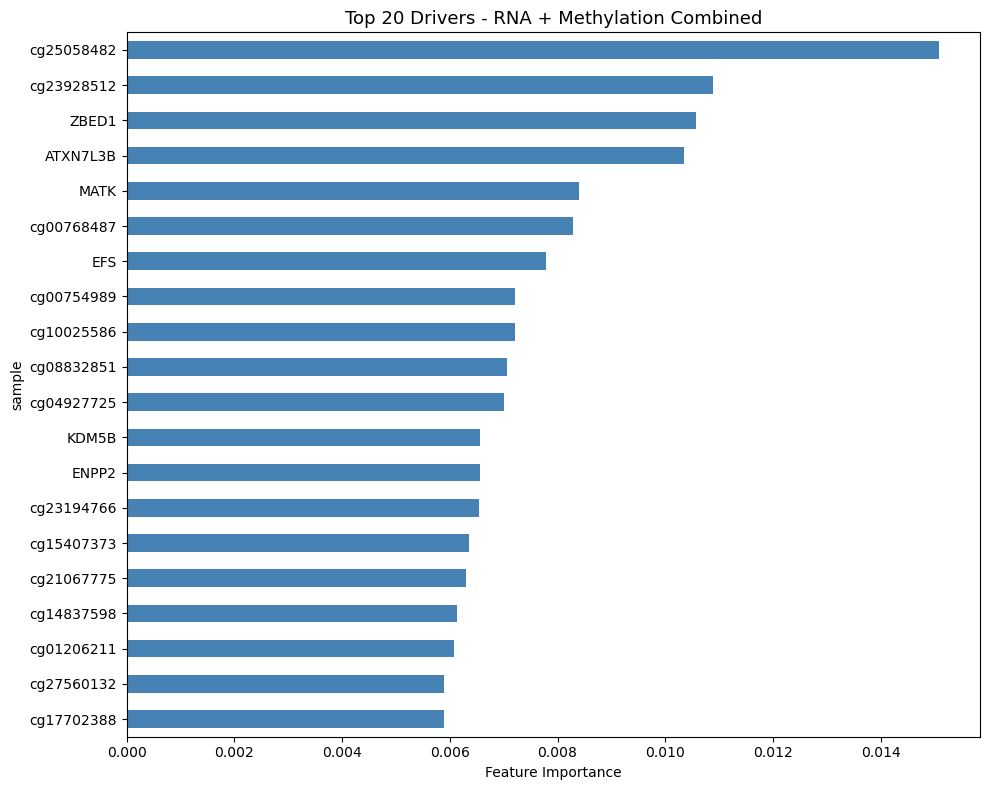

sample
cg25058482    0.015091
cg23928512    0.010891
ZBED1         0.010566
ATXN7L3B      0.010349
MATK          0.008394
cg00768487    0.008278
EFS           0.007783
cg00754989    0.007204
cg10025586    0.007202
cg08832851    0.007062
cg04927725    0.007012
KDM5B         0.006562
ENPP2         0.006560
cg23194766    0.006550
cg15407373    0.006357
cg21067775    0.006304
cg14837598    0.006125
cg01206211    0.006083
cg27560132    0.005892
cg17702388    0.005884
dtype: float64


In [26]:
# Fit RF on combined data
rf.fit(X_scaled, y_final)

importances2 = pd.Series(rf.feature_importances_, index=X_combined.columns)
top20_combined = importances2.nlargest(20)

top20_combined.sort_values().plot(kind='barh', color='steelblue', figsize=(10,8))
plt.title('Top 20 Drivers - RNA + Methylation Combined', fontsize=13)
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.savefig(os.path.join(downloads, 'top20_combined.png'), dpi=150)
plt.show()

print(top20_combined)

In [27]:
top_probes = ['cg25058482', 'cg23928512', 'cg00768487', 'cg00754989', 'cg10025586']
print("Top methylation probes to look up:", top_probes)

Top methylation probes to look up: ['cg25058482', 'cg23928512', 'cg00768487', 'cg00754989', 'cg10025586']


In [28]:
import urllib.request

# Download official Illumina 450k probe annotation
url = "https://zhouserver.research.chop.edu/InfiniumAnnotation/20180909/HM450/HM450.hg19.manifest.tsv.gz"
ann_path = os.path.join(downloads, "HM450_annotation.tsv.gz")

print("Downloading annotation file...")
urllib.request.urlretrieve(url, ann_path)
print("Done!")

# Load it
ann = pd.read_csv(ann_path, sep='\t', compression='gzip', index_col=0, low_memory=False)
print("Annotation shape:", ann.shape)
print("Columns:", ann.columns.tolist()[:10])

Done!
Annotation shape: (485577, 56)
Columns: ['CpG_beg', 'CpG_end', 'probe_strand', 'probeID', 'address_A', 'address_B', 'channel', 'designType', 'nextBase', 'nextBaseRef']


In [29]:
# Find gene names for top probes
top_probes = ['cg25058482', 'cg23928512', 'cg00768487', 'cg00754989', 'cg10025586']

# Check which column has gene names
gene_cols = [col for col in ann.columns if 'gene' in col.lower() or 'Gene' in col]
print("Gene-related columns:", gene_cols)

# Look up each probe
for probe in top_probes:
    if probe in ann.index:
        row = ann.loc[probe, gene_cols]
        print(f"\n{probe}:", row.values)
    else:
        print(f"\n{probe}: not found")

Gene-related columns: ['gene', 'gene_HGNC', 'MASK_general']

cg25058482: not found

cg23928512: not found

cg00768487: not found

cg00754989: not found

cg10025586: not found


In [30]:
print("Annotation index name:", ann.index.name)
print("First few index values:", ann.index[:5].tolist())
print("\nChecking probeID column instead:")
match = ann[ann['probeID'].isin(top_probes)]
print(match[['probeID', 'gene', 'gene_HGNC']])

Annotation index name: CpG_chrm
First few index values: ['chr1', 'chr1', 'chr1', 'chr1', 'chr1']

Checking probeID column instead:
             probeID             gene        gene_HGNC
CpG_chrm                                              
chr1      cg00768487           UBXN11           UBXN11
chr2      cg25058482  AC009313.1;TANK  AC009313.1;TANK
chr15     cg00754989              NaN              NaN
chr15     cg10025586            WHAMM            WHAMM
chr17     cg23928512          ASPSCR1          ASPSCR1


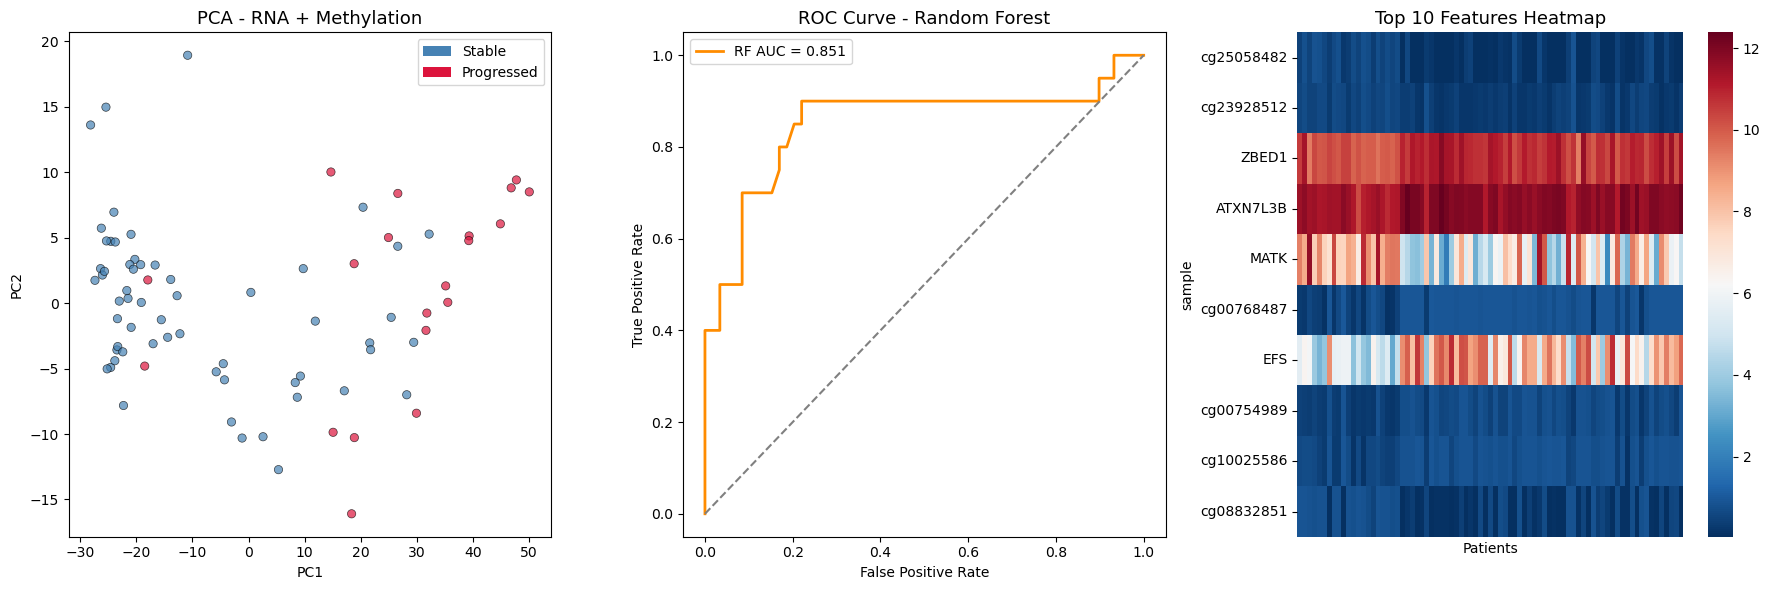

Saved!


In [31]:
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# --- Plot 1: PCA ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

colors = ['steelblue' if label == 0 else 'crimson' for label in y_final]
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=colors, alpha=0.7, edgecolors='k', linewidth=0.5)
axes[0].set_title('PCA - RNA + Methylation', fontsize=13)
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='steelblue', label='Stable'),
                   Patch(facecolor='crimson', label='Progressed')]
axes[0].legend(handles=legend_elements)

# --- Plot 2: ROC Curve ---
from sklearn.model_selection import cross_val_predict
y_prob = cross_val_predict(rf, X_scaled, y_final, cv=cv, method='predict_proba')[:, 1]
fpr, tpr, _ = roc_curve(y_final, y_prob)
roc_auc = auc(fpr, tpr)
axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'RF AUC = {roc_auc:.3f}')
axes[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
axes[1].set_title('ROC Curve - Random Forest', fontsize=13)
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].legend()

# --- Plot 3: Top 20 Genes Heatmap ---
top10_genes = importances2.nlargest(10).index
heatmap_data = X_combined[top10_genes]
heatmap_data.index = [('Progressed' if l == 1 else 'Stable') for l in y_final]
heatmap_data_sorted = heatmap_data.sort_index()
sns.heatmap(heatmap_data_sorted.T, cmap='RdBu_r', ax=axes[2], 
            xticklabels=False, yticklabels=True)
axes[2].set_title('Top 10 Features Heatmap', fontsize=13)
axes[2].set_xlabel('Patients')

plt.tight_layout()
plt.savefig(os.path.join(downloads, 'UVM_results.png'), dpi=150)
plt.show()
print("Saved!")